In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
import statsmodels.api as sm
from scipy.stats import zscore
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from scipy.spatial.distance import pdist
%matplotlib inline 

In [2]:
df= pd.read_csv("/content/auto-mpg (1).csv")

In [3]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [5]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [6]:
#Clustering  k means
df[df['horsepower']=="?"]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [7]:
df['horsepower'] = df['horsepower'].replace('?', 0)

In [8]:
df['horsepower']=df['horsepower'].apply(lambda x: float(x))

In [9]:
df.shape

(398, 9)

In [10]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [12]:
df=df.drop(['car name'],axis=1)

df.corr(method='kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.686477,-0.679847,-0.668342,-0.694006,0.301096,0.413661,0.467249
cylinders,-0.686477,1.000000,0.794854,0.680132,0.735481,-0.367194,-0.273742,-0.551610
displacement,-0.679847,0.794854,1.000000,0.706173,0.800508,-0.352110,-0.218920,-0.570074
horsepower,-0.668342,0.680132,0.706173,1.000000,0.691479,-0.485809,-0.279253,-0.389465
weight,-0.694006,0.735481,0.800508,0.691479,1.000000,-0.268619,-0.196863,-0.496185
acceleration,0.301096,-0.367194,-0.352110,-0.485809,-0.268619,1.000000,0.196024,0.173055
model year,0.413661,-0.273742,-0.218920,-0.279253,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.389465,-0.496185,0.173055,0.136967,1.000000


In [13]:
# Calculating new columns for analysis
df['hp_weight']=df['horsepower']/df['weight']
df['fuel_eco']=(df['displacement']*df['cylinders'])/(df['weight']*0.45)
df['vehicle_perf']=(df['horsepower']*df['weight'])/(df['acceleration']*2.75)
df['engine_efficiency']=(df['horsepower']/(df['displacement']/1000))**0.6

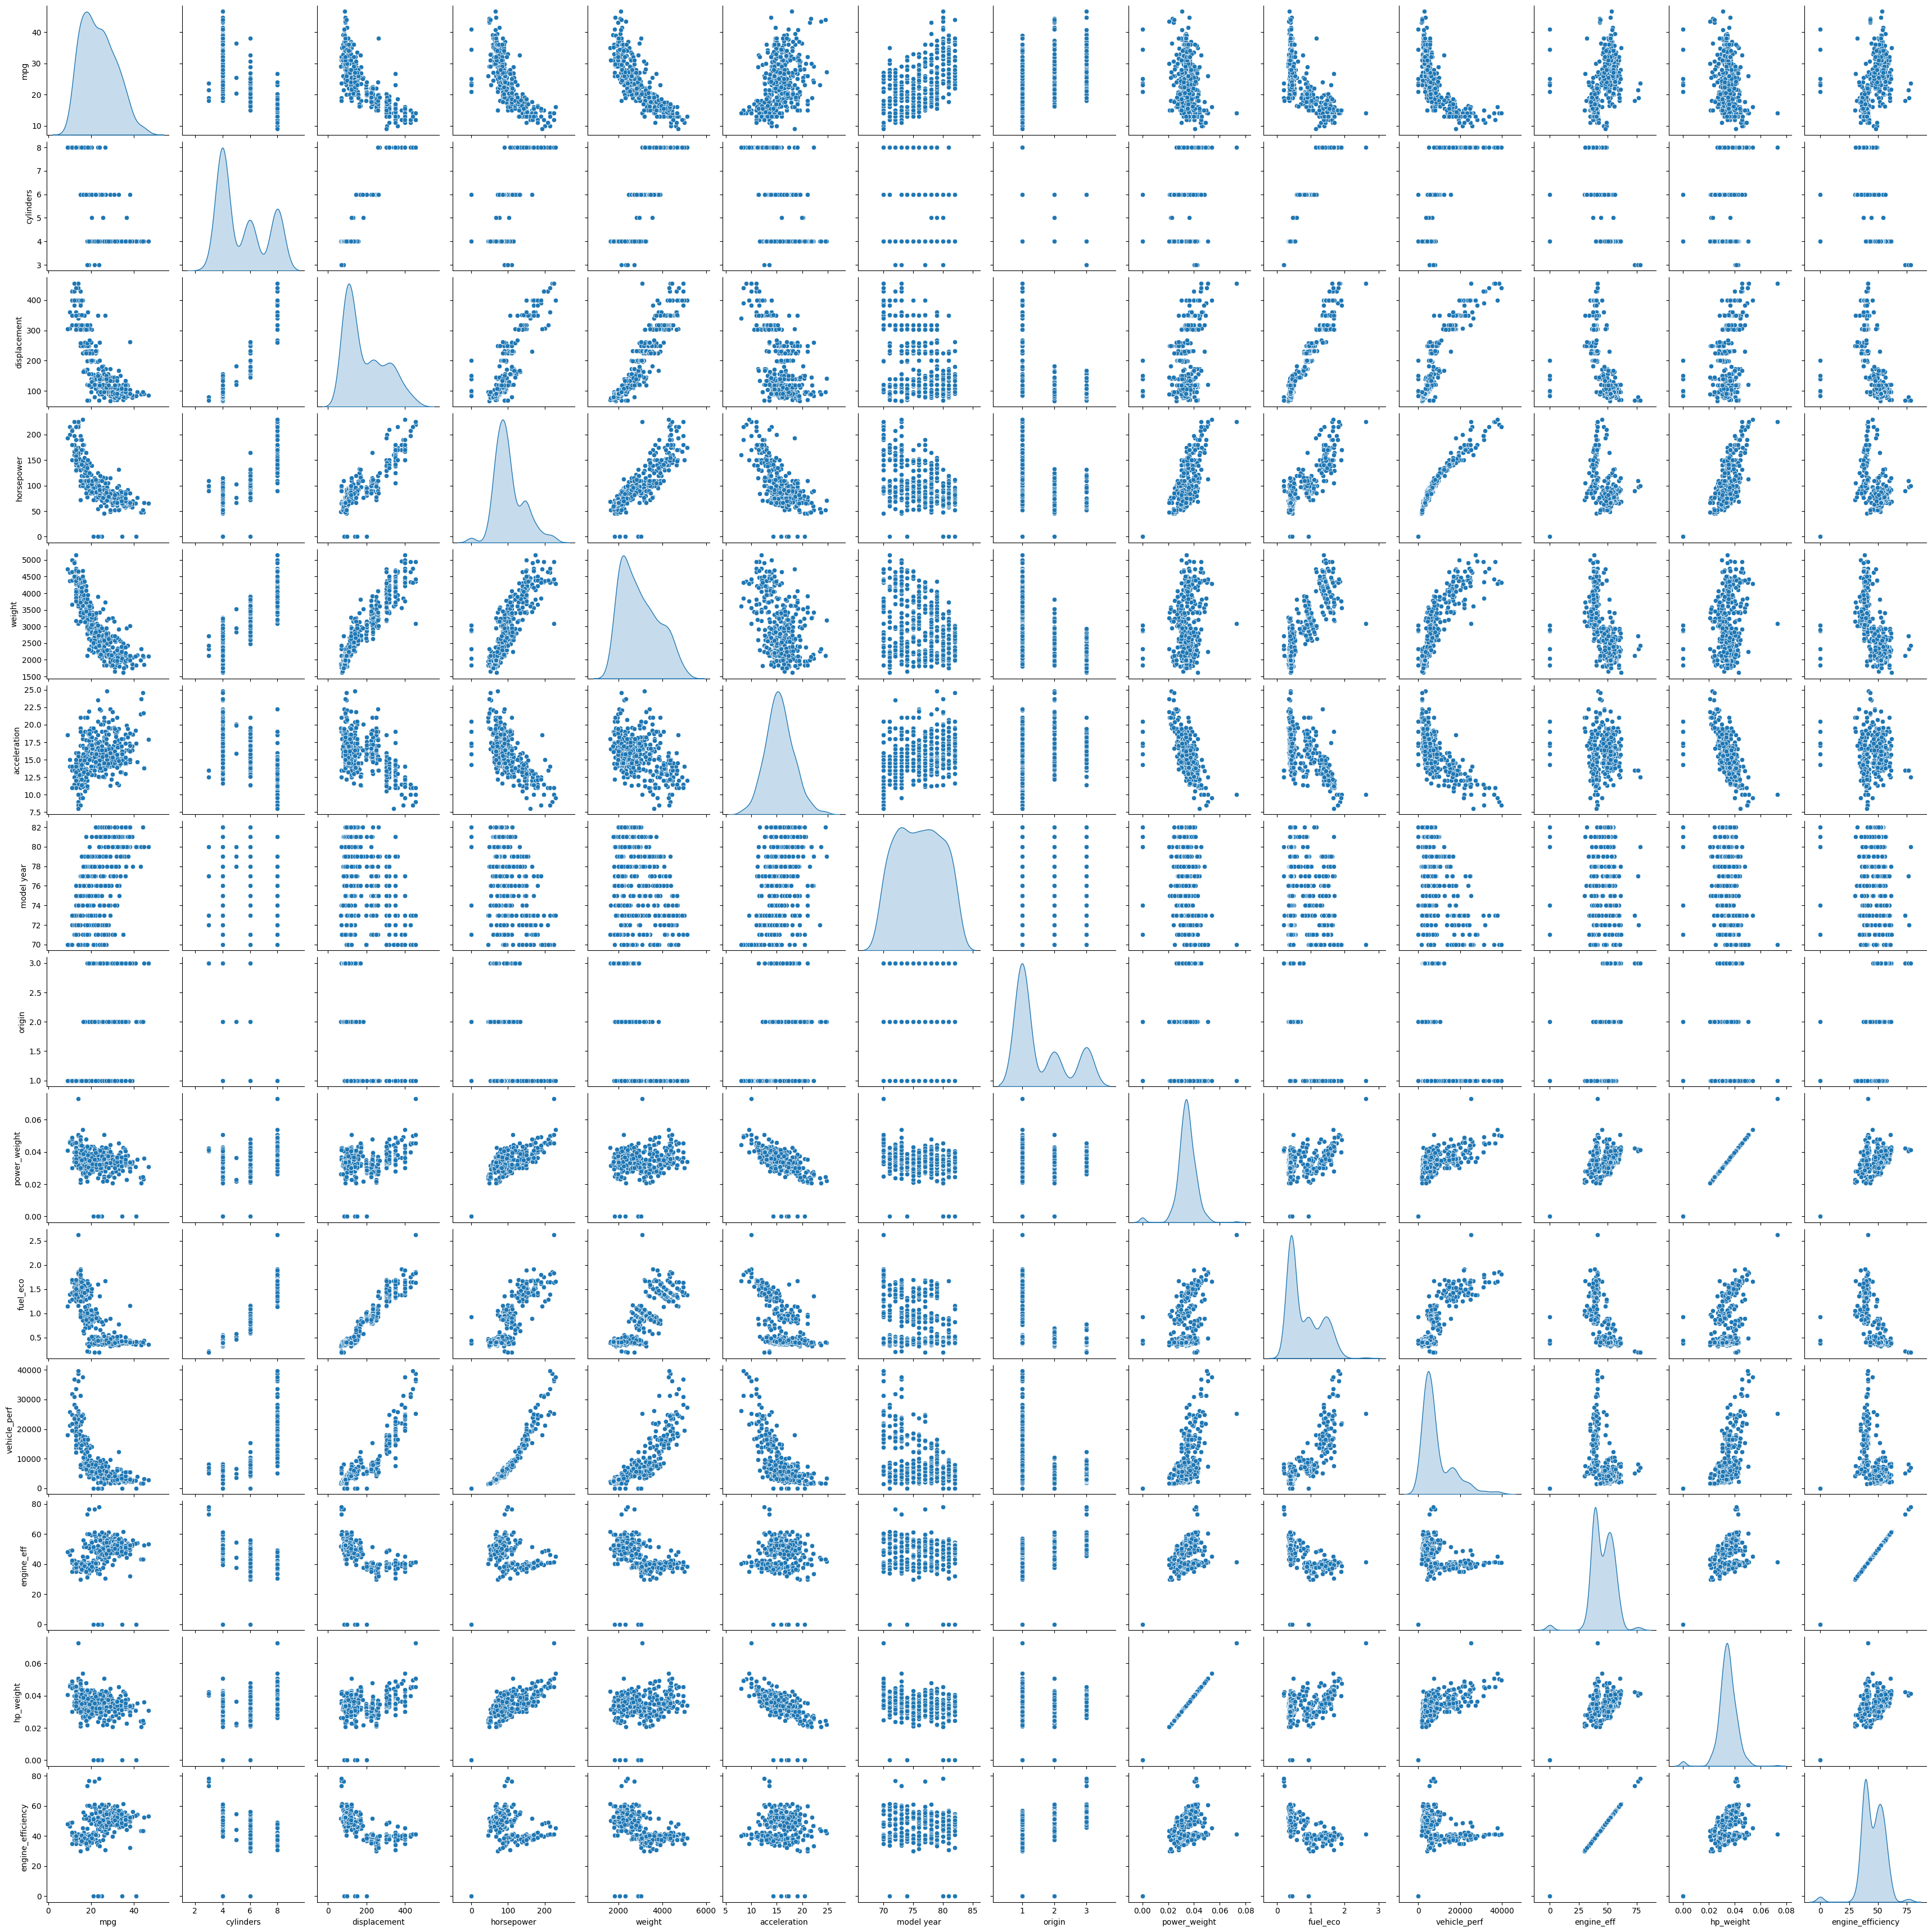

In [23]:
sns.pairplot(df, diag_kind = 'kde');

<ipython-input-28-f83403ca4dd4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


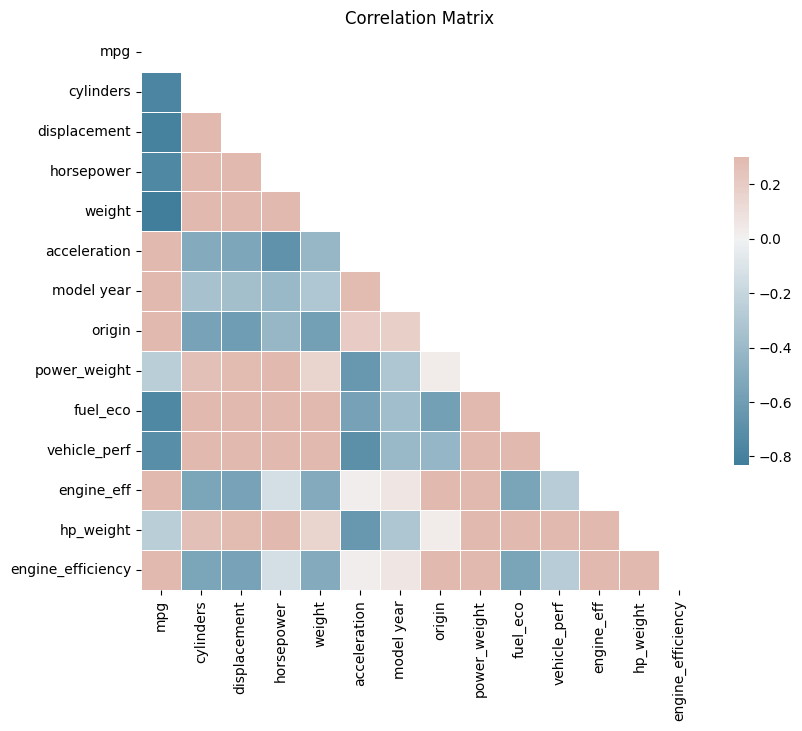

In [28]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(9, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

ax.set_title("Correlation Matrix")

plt.show()

In [18]:
x1= df.drop(["mpg"], axis=1)
y1 = df['mpg']
X_train, X_test, y_train, y_test = train_test_split(x1, y1 , test_size=0.26, random_state=0, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predict1 = regressor.predict(X_test)
regressor.score(X_test,y_test)

0.8469016339268721

In [29]:
# Defining the predictor variables
X = df[['cylinders', 'displacement', 'weight', 'acceleration', 'horsepower', 'origin', 'power_weight', 'fuel_eco','vehicle_perf','engine_eff']]

# Adding a constant variable for intercept
X = sm.add_constant(X)

# Defining the response variable
y = df['mpg']

# Fitting the multiple linear regression model
model = sm.OLS(y, X).fit()

# Printing the summary statistics of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     112.4
Date:                Sun, 30 Apr 2023   Prob (F-statistic):          6.60e-108
Time:                        18:34:02   Log-Likelihood:                -1111.6
No. Observations:                 398   AIC:                             2245.
Df Residuals:                     387   BIC:                             2289.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           49.5947      6.234      7.955   

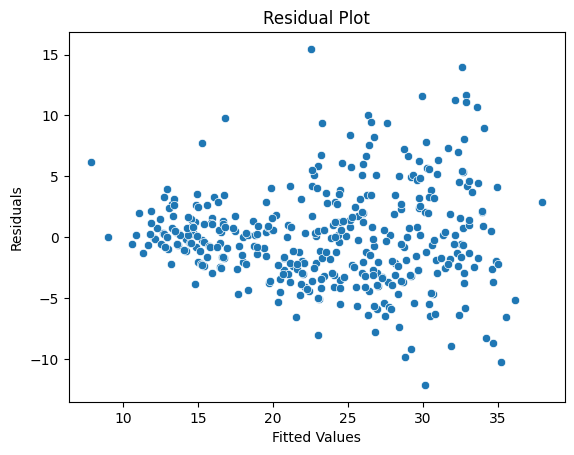

In [30]:
#Assumption Testing
# Plotting the residual plot
residuals = model.resid
sns.scatterplot(x=model.predict(), y=residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [31]:
#Kmeans
from sklearn.cluster import KMeans
X = df.drop(['car name'], axis=1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

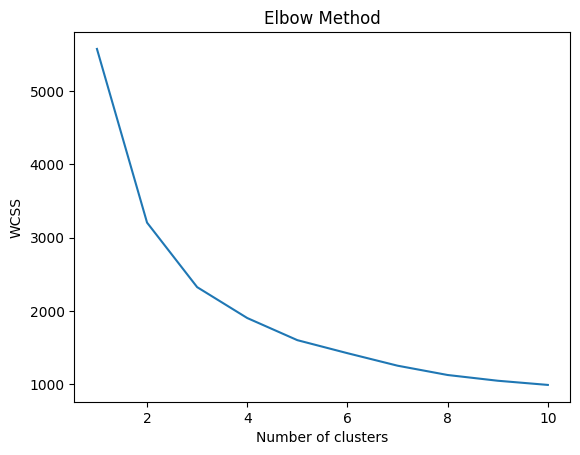

In [32]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


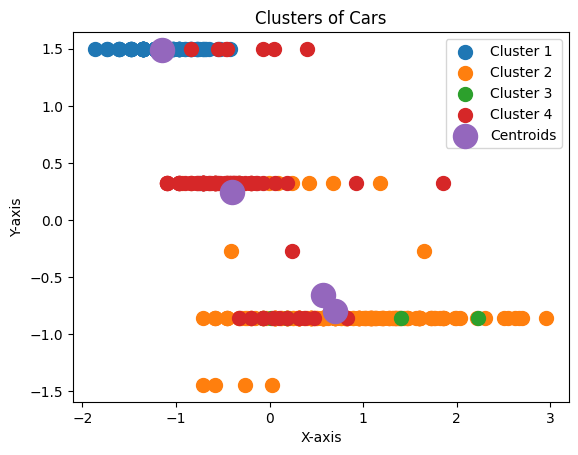

In [36]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s = 100, label = 'Cluster 3')
plt.scatter(X_scaled[y_kmeans == 3, 0], X_scaled[y_kmeans == 3, 1], s = 100, label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Clusters of Cars')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()


In [35]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.36212334855051803


In [37]:
kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


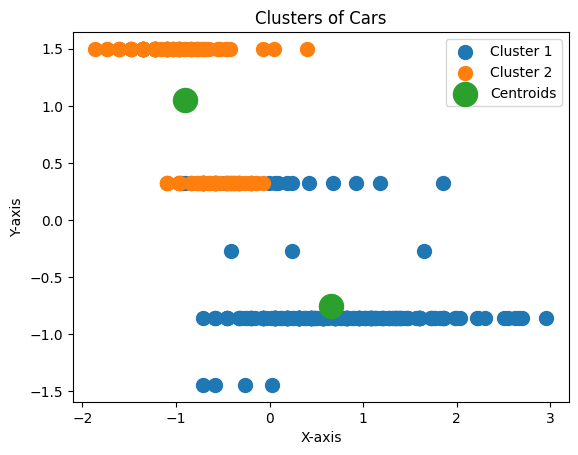

In [38]:
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s = 100, label = 'Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s = 100, label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, label = 'Centroids')
plt.title('Clusters of Cars')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.show()

In [39]:
from sklearn.metrics import silhouette_score

# Calculate silhouette score
silhouette_avg = silhouette_score(X_scaled, y_kmeans)

print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : 0.4034129502528621


In [40]:
#Splitting the data on the basis of the two clusters
X_cluster0 = X[y_kmeans == 0]
X_cluster1 = X[y_kmeans == 1]

In [41]:
X_cluster0.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,power_weight,fuel_eco,vehicle_perf,engine_eff,hp_weight,engine_efficiency
count,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000,231.000000
mean,28.615152,4.168831,115.235931,79.489177,2377.718615,16.441126,77.199134,1.987013,0.033539,0.451074,4443.149106,50.633601,0.033539,50.633601
std,5.990005,0.591298,29.299458,20.524823,396.865209,2.441774,3.674140,0.836559,0.007035,0.122728,1993.347729,9.685844,0.007035,9.685844
min,16.200000,3.000000,68.000000,0.000000,1613.000000,11.300000,70.000000,1.000000,0.000000,0.192837,0.000000,0.000000,0.000000,0.000000
25%,24.000000,4.000000,97.000000,68.000000,2074.500000,14.500000,74.000000,1.000000,0.031002,0.389534,3069.449761,47.754333,0.031002,47.754333
50%,28.000000,4.000000,108.000000,80.000000,2290.000000,16.000000,78.000000,2.000000,0.033913,0.418535,4185.606061,51.561219,0.033913,51.561219
75%,32.400000,4.000000,135.000000,90.000000,2662.500000,18.000000,80.000000,3.000000,0.037375,0.470756,5483.228840,55.351739,0.037375,55.351739
max,46.600000,6.000000,262.000000,133.000000,3820.000000,24.800000,82.000000,3.000000,0.050582,1.158651,12252.631579,78.152194,0.050582,78.152194


In [42]:
# Defining the predictor variables
X0 = X_cluster0[['weight','power_weight','vehicle_perf','model year']]
# Adding a constant variable for intercept
X0 = sm.add_constant(X0)

# Defining the response variable
y0 = X_cluster0['mpg']

# Fitting the multiple linear regression model
model_c0 = sm.OLS(y0, X0).fit()

# Printing the summary statistics of the model
print(model_c0.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     113.1
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           8.45e-53
Time:                        18:43:46   Log-Likelihood:                -613.80
No. Observations:                 231   AIC:                             1238.
Df Residuals:                     226   BIC:                             1255.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -19.5375      6.570     -2.974   

In [43]:
# Defining the predictor variables
X1 =X_cluster1[['horsepower','power_weight','vehicle_perf','model year','origin','acceleration']]
#Adding a constant variable for intercept
X1 = sm.add_constant(X1)

# Defining the response variable
y1 = X_cluster1['mpg']

# Fitting the multiple linear regression model
model_c1 = sm.OLS(y1, X1).fit()

# Printing the summary statistics of the model
print(model_c1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.705
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     76.95
Date:                Sun, 30 Apr 2023   Prob (F-statistic):           6.96e-41
Time:                        18:43:58   Log-Likelihood:                -327.68
No. Observations:                 167   AIC:                             667.4
Df Residuals:                     161   BIC:                             686.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
horsepower      -0.1636      0.018     -8.884   

In [14]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df)
y_pred=kmeans.predict(df)
df["cluster"]=y_pred
print(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model year  origin  hp_weight  fuel_eco  vehicle_perf  engine_efficiency  \
0            70       1   0.037100  1.557585  13803.63

In [19]:
df['cluster'].value_counts()

0    299
1     73
2     26
Name: cluster, dtype: int64

In [20]:
#first cluster
df1 = df[df['cluster'] == 0]
df1=df1.drop(['cluster'],axis=1)
df1

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_weight,fuel_eco,vehicle_perf,engine_efficiency
14,24.0,4,113.0,95.0,2372,15.0,70,3,0.040051,0.423459,5462.787879,56.857413
15,22.0,6,198.0,95.0,2833,15.5,70,1,0.033533,0.931874,6314.017595,40.610193
16,18.0,6,199.0,97.0,2774,15.5,70,1,0.034968,0.956501,6312.680352,40.996917
17,21.0,6,200.0,85.0,2587,16.0,70,1,0.032857,1.030795,4997.613636,37.760119
18,27.0,4,97.0,88.0,2130,14.5,70,3,0.041315,0.404799,4700.689655,59.515017
...,...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1,0.030824,0.446037,5593.006993,47.100146
394,44.0,4,97.0,52.0,2130,24.6,82,2,0.024413,0.404799,1637.250554,43.404921
395,32.0,4,135.0,84.0,2295,11.6,82,1,0.036601,0.522876,6043.260188,47.464325
396,28.0,4,120.0,79.0,2625,18.6,82,1,0.030095,0.406349,4054.252199,49.098419


In [21]:
#2nd cluster
df2 = df[df['cluster'] == 1]
df2=df2.drop(['cluster'],axis=1)
df2

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_weight,fuel_eco,vehicle_perf,engine_efficiency
0,18.0,8,307.0,130.0,3504,12.0,70,1,0.037100,1.557585,13803.636364,37.677579
1,15.0,8,350.0,165.0,3693,11.5,70,1,0.044679,1.684869,19267.826087,40.183665
2,18.0,8,318.0,150.0,3436,11.0,70,1,0.043655,1.645324,17038.016529,40.197448
3,16.0,8,304.0,150.0,3433,12.0,70,1,0.043694,1.574263,15604.545455,41.298151
4,17.0,8,302.0,140.0,3449,10.5,70,1,0.040591,1.556651,16722.424242,39.780722
...,...,...,...,...,...,...,...,...,...,...,...,...
289,16.9,8,350.0,155.0,4360,14.9,79,1,0.035550,1.427115,16492.983527,38.704209
290,15.5,8,351.0,142.0,4054,14.3,79,1,0.035027,1.539221,14638.728544,36.659686
291,19.2,8,267.0,125.0,3605,15.0,79,1,0.034674,1.316690,10924.242424,40.016514
292,18.5,8,360.0,150.0,3940,13.0,79,1,0.038071,1.624365,16531.468531,37.314124


In [22]:
# 3rd cluster
df3 = df[df['cluster'] == 2]
df3=df3.drop(["cluster"],axis=1)
df3

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_weight,fuel_eco,vehicle_perf,engine_efficiency
5,15.0,8,429.0,198.0,4341,10.0,70,1,0.045612,1.756892,31255.200000,39.675713
6,14.0,8,454.0,220.0,4354,9.0,70,1,0.050528,1.853723,38702.222222,40.852637
7,14.0,8,440.0,215.0,4312,8.5,70,1,0.049861,1.814059,39661.176471,41.057402
8,14.0,8,455.0,225.0,4425,10.0,70,1,0.050847,1.827997,36204.545455,41.352586
9,15.0,8,390.0,190.0,3850,8.5,70,1,0.049351,1.800866,31294.117647,40.983911
11,14.0,8,340.0,160.0,3609,8.0,70,1,0.044334,1.674825,26247.272727,40.140672
13,14.0,8,455.0,225.0,3086,10.0,70,1,0.072910,2.621156,25249.090909,41.352586
25,10.0,8,360.0,215.0,4615,14.0,70,1,0.046587,1.386782,25772.077922,46.310725
27,11.0,8,318.0,210.0,4382,13.5,70,1,0.047923,1.290126,24787.070707,49.189828
39,14.0,8,400.0,175.0,4464,11.5,71,1,0.039203,1.592991,24701.976285,38.422608


In [24]:
X2=df1.drop(["mpg"],axis=1)
X2

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_weight,fuel_eco,vehicle_perf,engine_efficiency
14,4,113.0,95.0,2372,15.0,70,3,0.040051,0.423459,5462.787879,56.857413
15,6,198.0,95.0,2833,15.5,70,1,0.033533,0.931874,6314.017595,40.610193
16,6,199.0,97.0,2774,15.5,70,1,0.034968,0.956501,6312.680352,40.996917
17,6,200.0,85.0,2587,16.0,70,1,0.032857,1.030795,4997.613636,37.760119
18,4,97.0,88.0,2130,14.5,70,3,0.041315,0.404799,4700.689655,59.515017
...,...,...,...,...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790,15.6,82,1,0.030824,0.446037,5593.006993,47.100146
394,4,97.0,52.0,2130,24.6,82,2,0.024413,0.404799,1637.250554,43.404921
395,4,135.0,84.0,2295,11.6,82,1,0.036601,0.522876,6043.260188,47.464325
396,4,120.0,79.0,2625,18.6,82,1,0.030095,0.406349,4054.252199,49.098419


In [28]:
y2=df1['mpg']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X2, y2 , test_size=0.26, random_state=0, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predict = regressor.predict(X_test)
accuracy1=regressor.score(X_test,y_test)
print(accuracy1)

0.7489071895139436


In [30]:
regressor.coef_

array([ 1.91711172e+00,  7.10973343e-02, -1.63804674e-01, -1.20575425e-02,
        3.77686081e-01,  8.68330119e-01,  4.41109133e-01, -3.09767097e+01,
       -1.11561445e+01,  1.01152715e-03,  1.66770279e-01])

In [33]:
X3=df2.drop(["mpg"],axis=1)
X3

,cylinders,displacement,horsepower,weight,acceleration,model year,origin,hp_weight,fuel_eco,vehicle_perf,engine_efficiency
0,8,307.0,130.0,3504,12.0,70,1,0.037100,1.557585,13803.636364,37.677579
1,8,350.0,165.0,3693,11.5,70,1,0.044679,1.684869,19267.826087,40.183665
2,8,318.0,150.0,3436,11.0,70,1,0.043655,1.645324,17038.016529,40.197448
3,8,304.0,150.0,3433,12.0,70,1,0.043694,1.574263,15604.545455,41.298151
4,8,302.0,140.0,3449,10.5,70,1,0.040591,1.556651,16722.424242,39.780722
...,...,...,...,...,...,...,...,...,...,...,...
289,8,350.0,155.0,4360,14.9,79,1,0.035550,1.427115,16492.983527,38.704209
290,8,351.0,142.0,4054,14.3,79,1,0.035027,1.539221,14638.728544,36.659686
291,8,267.0,125.0,3605,15.0,79,1,0.034674,1.316690,10924.242424,40.016514
292,8,360.0,150.0,3940,13.0,79,1,0.038071,1.624365,16531.468531,37.314124


In [34]:
y3=df2['mpg']

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X3, y3 , test_size=0.26, random_state=0, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predict = regressor.predict(X_test)
accuracy2=regressor.score(X_test,y_test)
print(accuracy2)


0.6197685377835602


In [36]:
X4 = df3.drop(["mpg"], axis=1)
X4
y4=df3['mpg']


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X4, y4 , test_size=0.26, random_state=0, shuffle=True)
regressor = LinearRegression()
regressor.fit(X_train,y_train)
predict = regressor.predict(X_test)
accuracy3=regressor.score(X_test,y_test)
print(accuracy3)


-0.6651831307195868
